In [ ]:
pip install tensorflow keras numpy

In [40]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


# 創建 CNN 模型
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),  # Add this line to flatten the output
    layers.Dense(128, activation='relu'),  # 增加神經元數
    layers.Dense(1, activation='sigmoid')
])

# 編譯模型
optimizer = Adam(learning_rate=0.001)  # 默認是0.001，嘗試使用0.01或更大值
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

# 檢視模型架構
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
from google.colab import drive
import joblib


# 掛載 Google Drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [41]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/Data',  # 訓練數據的目錄
    target_size=(150, 150),  # 所有圖像會調整到150x150
    batch_size=32,
    class_mode='binary')  # 二元分類：貓和其他

# 獲取一批訓練影像和標籤
train_images, train_labels = next(train_generator)


Found 2248 images belonging to 2 classes.


Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.5131 - loss: 0.7988 - val_accuracy: 0.5562 - val_loss: 0.6919
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.5446 - loss: 0.6912 - val_accuracy: 0.5231 - val_loss: 0.6879
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.5409 - loss: 0.6828 - val_accuracy: 0.5263 - val_loss: 0.6792
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.5687 - loss: 0.6786 - val_accuracy: 0.5818 - val_loss: 0.6725
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.5869 - loss: 0.6704 - val_accuracy: 0.5925 - val_loss: 0.6705
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.5673 - loss: 0.6763 - val_accuracy: 0.5401 - val_loss: 0.6959
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.6015 - loss: 0.6674 - val_accuracy: 0.5863 - val_loss: 0.6734
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.5871 - loss: 0.6712 - val_accu

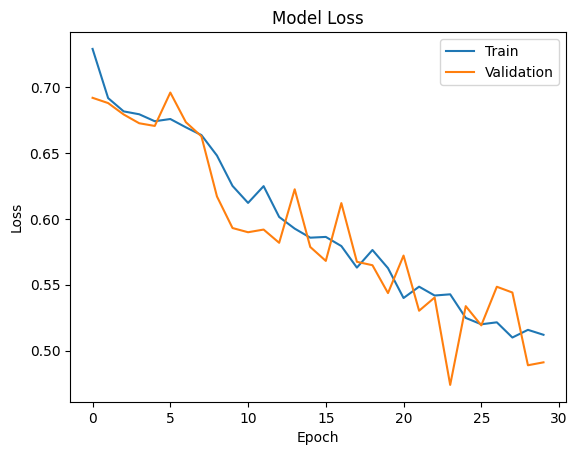

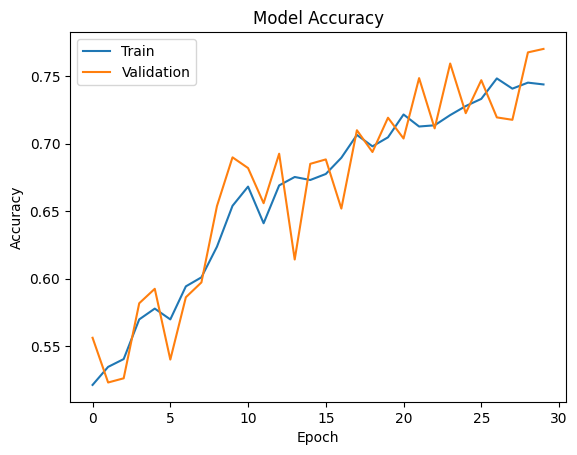

In [42]:
import matplotlib.pyplot as plt

# 訓練過程中的歷史數據
history = model.fit(train_generator, steps_per_epoch=100, epochs=30, validation_data=train_generator, validation_steps=50)

# 繪製訓練與驗證損失
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# 繪製訓練與驗證準確率
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


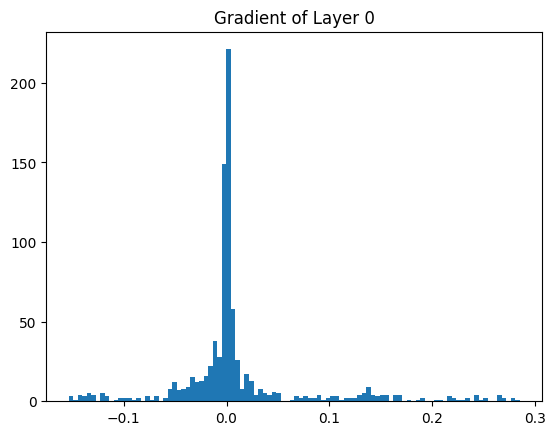

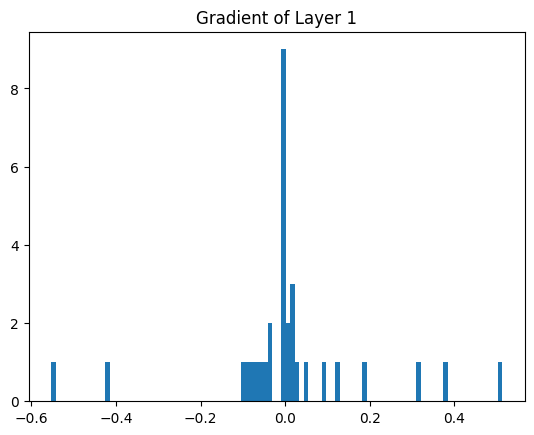

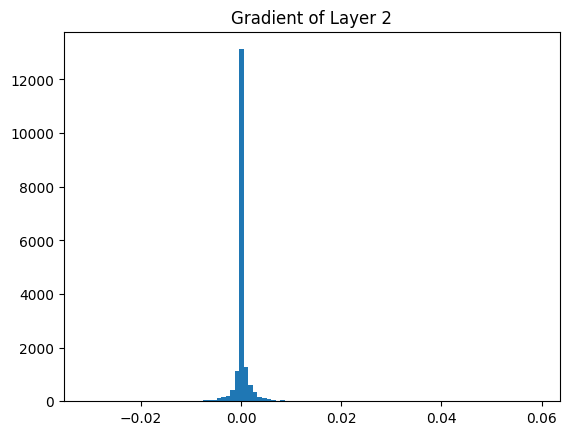

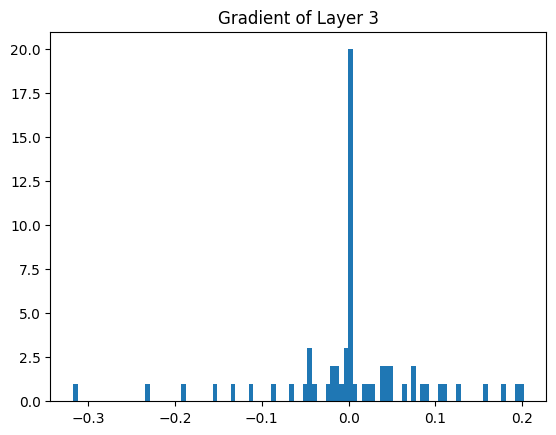

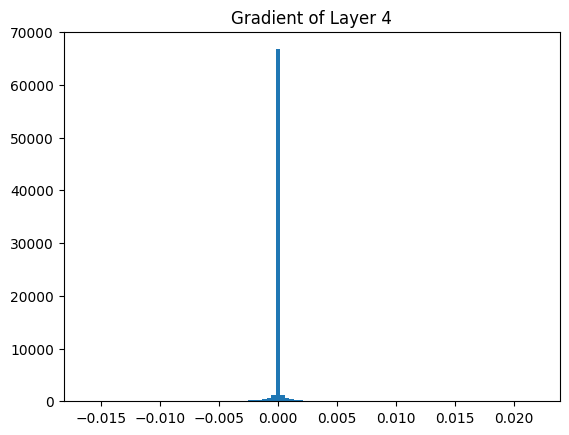

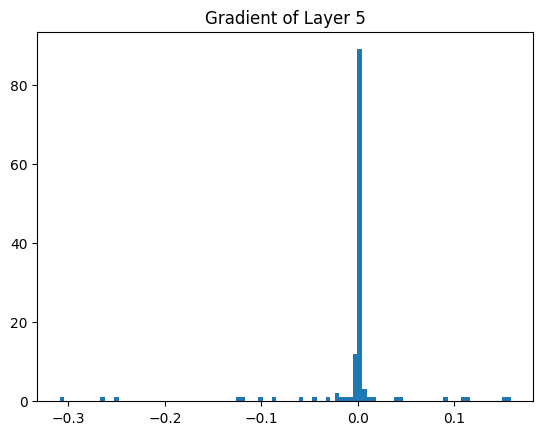

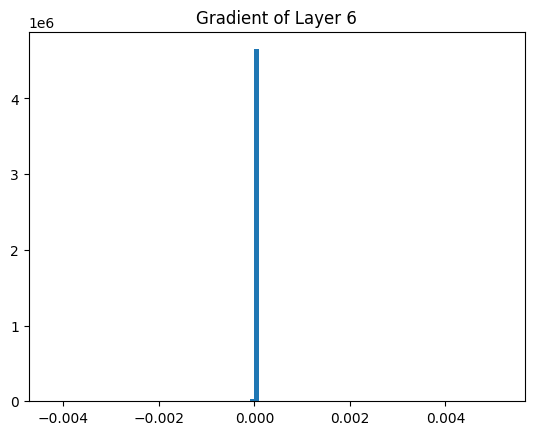

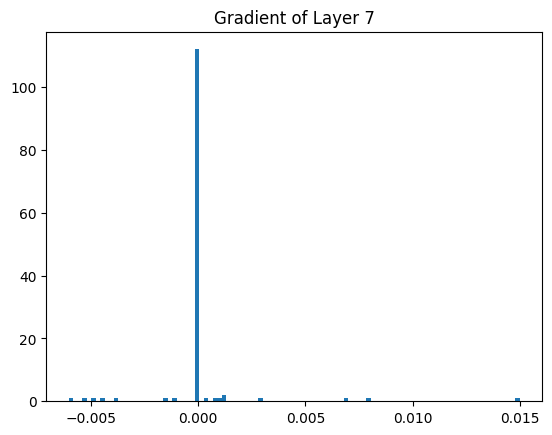

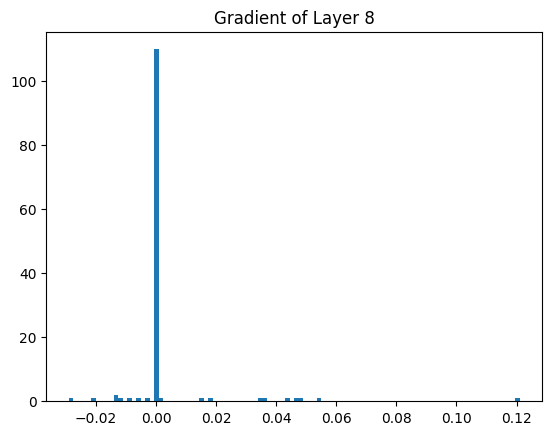

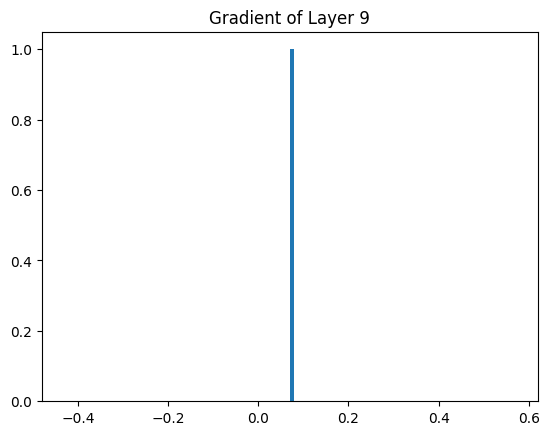

In [43]:
import tensorflow as tf

# 定義你想要計算梯度的輸入和目標
inputs = tf.convert_to_tensor(train_images, dtype=tf.float32)
targets = tf.convert_to_tensor(train_labels, dtype=tf.float32)

# 監控梯度變化
with tf.GradientTape() as tape:
    predictions = model(inputs)
    predictions = tf.reshape(predictions, [-1])
    loss = tf.keras.losses.binary_crossentropy(targets, predictions)

# 計算每一層的梯度
gradients = tape.gradient(loss, model.trainable_variables)

# 你可以自行選擇某些梯度進行可視化
for i, gradient in enumerate(gradients):
    plt.figure()
    plt.title(f'Gradient of Layer {i}')
    plt.hist(gradient.numpy().flatten(), bins=100)
    plt.show()


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/testdata',  # 測試數據的目錄
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False)  # 設為 False 保持數據順序，方便後續分析

Found 186 images belonging to 2 classes.


In [44]:
# 評估模型在測試數據集上的性能
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test accuracy:', test_accuracy)
print('Test loss:', test_loss)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 470ms/step - accuracy: 0.7935 - loss: 0.4940
Test accuracy: 0.8118279576301575
Test loss: 0.45251813530921936


In [46]:
from tensorflow.keras.preprocessing import image
import numpy as np

# 載入圖片並調整大小
img_path = '/content/gdrive/MyDrive/testdata/cats/cat.26.jpg'
img = image.load_img(img_path, target_size=(150, 150))

# 轉換為數組並進行縮放
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
# 增加一個維度以匹配模型輸入
img_array /= 255.0
# 與訓練時的預處理一致

# 進行預測
prediction = model.predict(img_array)

# 解讀預測結果
if prediction[0][0] > 0.5:
    print("模型預測這是一張貓的圖片。")
else:
    print("模型預測這不是一張貓的圖片。")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
模型預測這是一張貓的圖片。


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


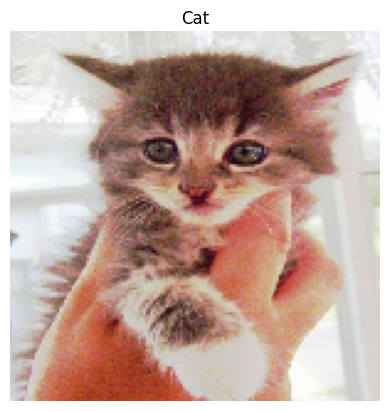

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


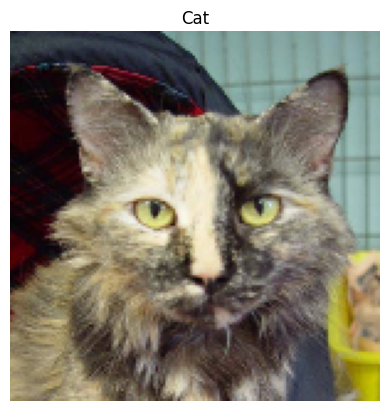

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


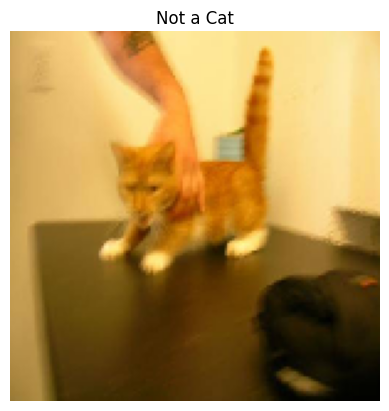

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


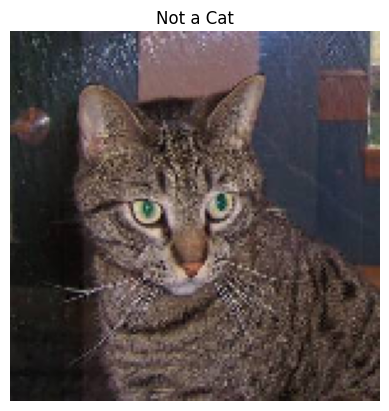

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


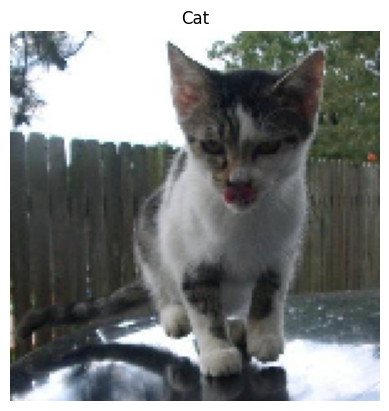

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


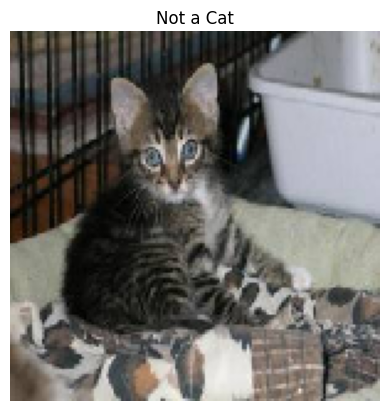

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


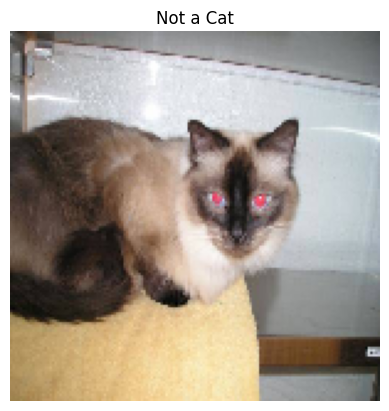

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


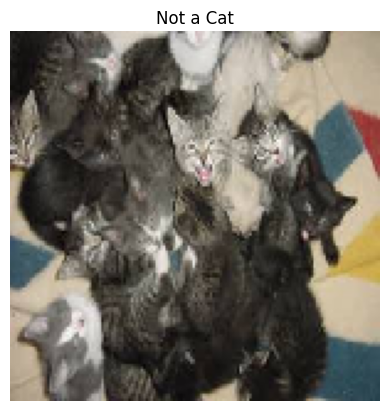

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


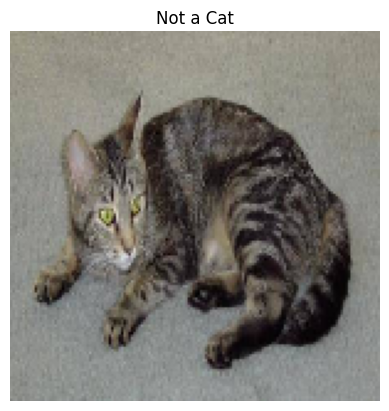

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


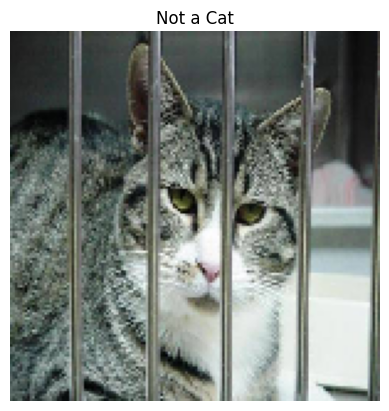

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


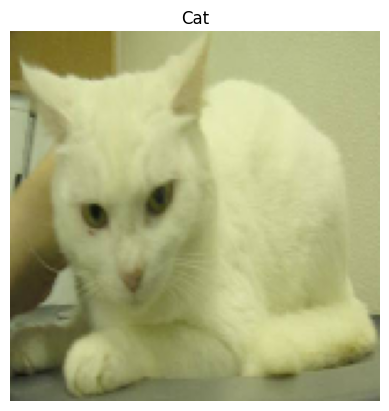

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


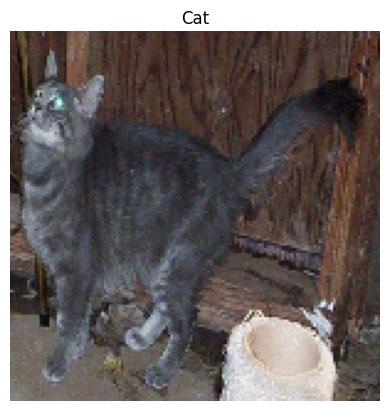

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


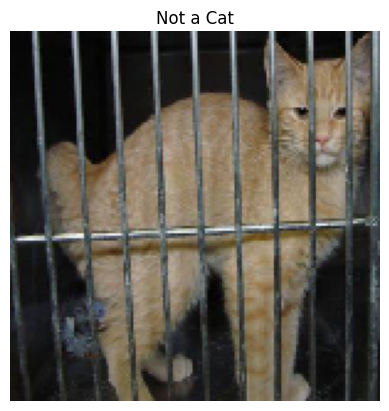

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


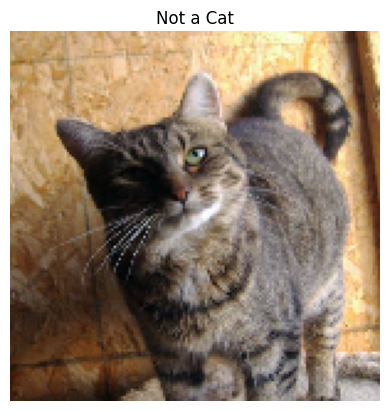

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


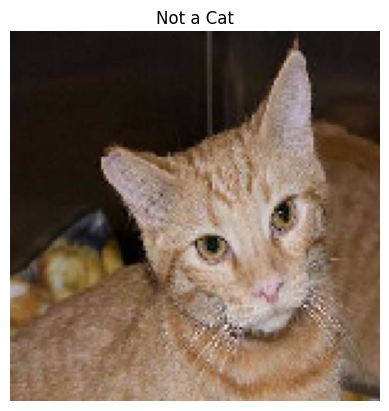

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


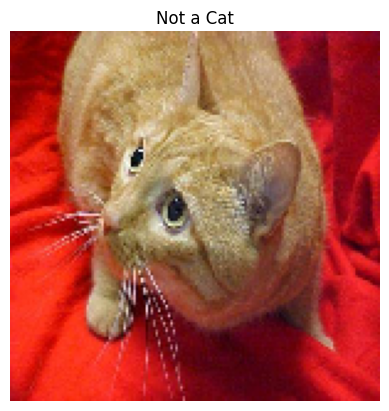

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


KeyboardInterrupt: 

In [48]:
import os
import matplotlib.pyplot as plt

# 圖片目錄
image_dir = '/content/gdrive/MyDrive/testdata/cats/'

# 獲取所有圖片的路徑
image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir)]

for img_path in image_paths:
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)

    # 顯示圖片和預測結果
    plt.imshow(img)
    if prediction[0][0] > 0.5:
        plt.title('Cat')
    else:
        plt.title('Not a Cat')
    plt.axis('off')
    plt.show()


In [49]:
from sklearn.metrics import classification_report, confusion_matrix

# 獲取真實標籤
test_generator.reset()
Y_true = test_generator.classes

# 獲取預測概率
Y_pred_prob = model.predict(test_generator)
Y_pred = np.where(Y_pred_prob > 0.5, 1, 0).flatten()

# 打印分類報告
target_names = ['Not Cat', 'Cat']
print('Classification Report')
print(classification_report(Y_true, Y_pred, target_names=target_names))

# 繪製混淆矩陣
print('Confusion Matrix')
print(confusion_matrix(Y_true, Y_pred))


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 752ms/step
Classification Report
              precision    recall  f1-score   support

     Not Cat       0.83      0.79      0.81        95
         Cat       0.79      0.84      0.81        91

    accuracy                           0.81       186
   macro avg       0.81      0.81      0.81       186
weighted avg       0.81      0.81      0.81       186

Confusion Matrix
[[75 20]
 [15 76]]


In [50]:
model.save('cat_classifier_model.h5')
